In [1]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from torchinfo import summary

from src.datasets import BiosensorDataset, create_datasets
from src.model_parts import *
from src.models import *
from src.train_tiling import train_model, evaluate
from src.utils import *

c:\Users\wittd\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device {device}')

torch.manual_seed(42)
np.random.seed(42)

batch_size = 16
upscale_factor = 1

config = {
    'path': 'C:/onlab_git/Onlab/data_with_centers/',
    'mask_type': bool,
    'augment': False,
    'noise': 0.0,
    'dilation': 0,
    'tiling': True,
    'tiling_ratio': 2,
}

create_dataset_args = {
    'train_percent': 0.59,
    'test_percent': 0.215,
}

calc_config = {
    'biosensor_length': 8,
    'mask_size': 80 * upscale_factor,
    'input_scaling': False,
    'upscale_mode': 'nearest',
}

train_dataset, val_dataset, test_dataset = create_datasets(config, create_dataset_args, calc_config)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Train size:', len(train_dataset))
print('Validation size:', len(val_dataset))
print('Test size:', len(test_dataset))

Using device cuda
Train size: 96
Validation size: 32
Test size: 35


In [3]:
model = UNet(n_channels=calc_config['biosensor_length'], n_classes=1, down_conv=SingleConv, up_conv=SingleConv, bilinear=False)
# model = SRUNet4(n_channels=calc_config['biosensor_length'], n_classes=1, down_conv=SingleConv, up_conv=SingleConv, bilinear=False)
model = model.to(device)
print(model.__class__.__name__)
project_name = "Testing tiling"
model_name = ""

model_summary = summary(model)
print(model_summary.trainable_params)

UNet
15330561


In [4]:
try:
    train_model(
        model,
        project_name,
        model_name,
        device,
        train_loader,
        val_loader,
        learning_rate=0.03,
        epochs=5,
        checkpoint_dir='test_saves',
        amp=True,
        wandb_logging=False,
        tile_ratio=config['tiling_ratio'],
    )
except torch.cuda.OutOfMemoryError:
    torch.cuda.empty_cache()
    print('Detected OutOfMemoryError!')

Starting training:
        Epochs:          15
        Batch size:      16
        Learning rate:   0.03
        Training size:   96
        Validation size: 32
        Device:          cuda
        Mixed Precision: True
    


Validation Dice score: 0.03664712607860565, Detection rate: 0.02905920813657828


Epoch 1/15: 100%|██████████| 96/96 [00:15<00:00,  6.30img/s, loss (batch)=1.09]


Checkpoint 1 saved!


Validation Dice score: 0.16905122995376587, Detection rate: 0.19324373410824555


Epoch 2/15: 100%|██████████| 96/96 [00:15<00:00,  6.14img/s, loss (batch)=1.01]


Checkpoint 2 saved!


Validation Dice score: 0.36766403913497925, Detection rate: 0.5742826007991282


Epoch 3/15: 100%|██████████| 96/96 [00:16<00:00,  6.00img/s, loss (batch)=0.846]


Checkpoint 3 saved!


Validation Dice score: 0.40344443917274475, Detection rate: 0.6291318561569197


Epoch 4/15: 100%|██████████| 96/96 [00:15<00:00,  6.07img/s, loss (batch)=0.742]


Checkpoint 4 saved!


Validation Dice score: 0.4153594374656677, Detection rate: 0.628042135851798


Epoch 5/15: 100%|██████████| 96/96 [00:17<00:00,  5.50img/s, loss (batch)=0.703]


Checkpoint 5 saved!


Validation Dice score: 0.4276082515716553, Detection rate: 0.7410098074827461


Epoch 6/15: 100%|██████████| 96/96 [00:18<00:00,  5.10img/s, loss (batch)=0.708]


Checkpoint 6 saved!


Validation Dice score: 0.44233083724975586, Detection rate: 0.7312023247366509


Epoch 7/15: 100%|██████████| 96/96 [00:17<00:00,  5.41img/s, loss (batch)=0.706]


Checkpoint 7 saved!


Validation Dice score: 0.46335041522979736, Detection rate: 0.7882310207046858


Epoch 8/15: 100%|██████████| 96/96 [00:18<00:00,  5.33img/s, loss (batch)=0.81]


Checkpoint 8 saved!


Validation Dice score: 0.46801018714904785, Detection rate: 0.7842353795859063


Epoch 9/15: 100%|██████████| 96/96 [00:17<00:00,  5.61img/s, loss (batch)=0.716]


Checkpoint 9 saved!


Validation Dice score: 0.46592894196510315, Detection rate: 0.7838721394841991


Epoch 10/15: 100%|██████████| 96/96 [00:17<00:00,  5.38img/s, loss (batch)=0.708]


Checkpoint 10 saved!


Validation Dice score: 0.47214996814727783, Detection rate: 0.7962223029422448


Epoch 11/15: 100%|██████████| 96/96 [00:17<00:00,  5.63img/s, loss (batch)=0.676]


Checkpoint 11 saved!


Validation Dice score: 0.4668385982513428, Detection rate: 0.7875045405012714


Epoch 12/15: 100%|██████████| 96/96 [00:18<00:00,  5.08img/s, loss (batch)=0.735]


Checkpoint 12 saved!


Validation Dice score: 0.4682478606700897, Detection rate: 0.8034871049763894


Epoch 13/15: 100%|██████████| 96/96 [00:17<00:00,  5.52img/s, loss (batch)=0.797]


Checkpoint 13 saved!


Validation Dice score: 0.4682103395462036, Detection rate: 0.8045768252815111


Epoch 14/15: 100%|██████████| 96/96 [00:17<00:00,  5.61img/s, loss (batch)=0.78]


Checkpoint 14 saved!


Validation Dice score: 0.4577414393424988, Detection rate: 0.7907737014166364


Epoch 15/15: 100%|██████████| 96/96 [00:18<00:00,  5.27img/s, loss (batch)=0.75]


Checkpoint 15 saved!


In [ ]:
from torchinfo import summary
model_summary = summary(model, depth=4)
print(model_summary)
# print(model_summary.total_params)
# print(model_summary.trainable_params)

In [5]:
def evaluate_after_training(model, val_loader, test_loader, device):
    val_dice_score, val_detection_rate = evaluate(model, val_loader, device)
    dice_score, detection_rate = evaluate(model, test_loader, device)
    print(f'Validation dice score: {val_dice_score}, Detection rate: {val_detection_rate}')
    print(f'Test dice score: {dice_score}, Detection rate: {detection_rate}')


In [6]:
# Load the checkpoint
checkpoint = torch.load("test_saves/checkpoint_epoch14.pth")
# Get the learning rate and remove it from the checkpoint
lr = checkpoint.pop('learning_rate')
# Load the state dictionary into the model
model.load_state_dict(checkpoint)
# Move the model to the device
model = model.to(device)

evaluate_after_training(model, val_loader, test_loader, device)

Validation dice score: 0.4682103395462036, Detection rate: 0.8045768252815111
Test dice score: 0.4334051012992859, Detection rate: 0.7385919165580183


In [23]:
# Saving the best model for production
# model = UNet8(n_channels=8, n_classes=1)
# checkpoint = torch.load("checkpoints/checkpoint_8_4_85.pth")
# lr = checkpoint.pop('learning_rate')
# model.load_state_dict(checkpoint)

# torch.jit.script(model).save('saved_models/srunet8_len8_40dice.pth')

In [12]:
def create_tiles(bio, mask, ratio):
    ch, bh, bw = bio.shape
    mh, mw = mask.shape
    bio_size = bh // ratio
    mask_size = mh // ratio

    bio_tiles = bio.reshape(ch, ratio, bio_size, ratio, bio_size).permute(1, 3, 0, 2, 4).reshape(ratio * ratio, ch, bio_size, bio_size)
    mask_tiles = mask.reshape(ratio, mask_size, ratio, mask_size).permute(0, 2, 1, 3).reshape(ratio * ratio, mask_size, mask_size)
    print(bio_tiles.shape, mask_tiles.shape)

    return bio_tiles, mask_tiles

def merge_tiles(tiles):
    n, h, w = tiles.shape
    ratio = int(np.sqrt(n))
    merged = tiles.reshape(ratio, ratio, h, w).permute(0, 2, 1, 3).reshape(ratio * h, ratio * w)
    return merged

def plot_tiles(bio_tiles, mask_tiles):
    n, ch, h, w = bio_tiles.shape
    ratio = int(np.sqrt(n))

    fig, ax = plt.subplots(ratio, ratio, figsize=(8, 8))
    for i in range(ratio):
        for j in range(ratio):
            ax[i, j].imshow(bio_tiles[j + i * ratio, -1], cmap='gray')
            ax[i, j].imshow(mask_tiles[j + i * ratio], alpha=0.6)
            ax[i, j].axis('off')
    plt.tight_layout()
    plt.show()

In [31]:
def plot_results(bio, mask, prediction, binary_prediction):
    plt.figure(figsize=(30, 10))

    bio = bio.squeeze().cpu().detach().numpy()
    mask = mask.squeeze().cpu().detach().numpy()
    prediction = prediction.squeeze().cpu().detach().numpy()
    binary_prediction = binary_prediction.squeeze().cpu().detach().numpy()

    colored_mask = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.float32)
    colored_mask[mask == 1] = [1, 0, 0, 1]
    colored_mask[mask == 0] = [0, 0, 0, 0]

    colored_prediction = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.float32)
    colored_prediction[binary_prediction == 1] = [0, 0, 1, 1]
    colored_prediction[binary_prediction == 0] = [0, 0, 0, 0]

    plt.subplot(1, 3, 1)
    plt.imshow(bio, cmap='gray')
    plt.imshow(colored_mask, alpha=0.6)
    plt.title('Biosensor with mask')
    
    plt.subplot(1, 3, 2)
    plt.imshow(prediction, cmap='gray')
    plt.imshow(colored_prediction, alpha=0.6)
    plt.title('Prediction with the binary')

    intercection = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.float32)
    intercection[(mask == 1) & (binary_prediction == 1)] = [0, 1, 0, 1]

    plt.subplot(1, 3, 3)
    # plt.imshow(bio, cmap='gray')
    plt.imshow(colored_mask)
    plt.imshow(colored_prediction)
    plt.imshow(intercection)
    plt.title('Label and Prediction overlap')
    
    red_patch = mpatches.Patch(color=[1, 0, 0, 1], label='Mask')
    blue_patch = mpatches.Patch(color=[0, 0, 1, 1], label='Prediction')
    green_patch = mpatches.Patch(color=[0, 1, 0, 1], label='Overlap')

    plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper right', bbox_to_anchor=(1.5, 1))
    
    plt.show()

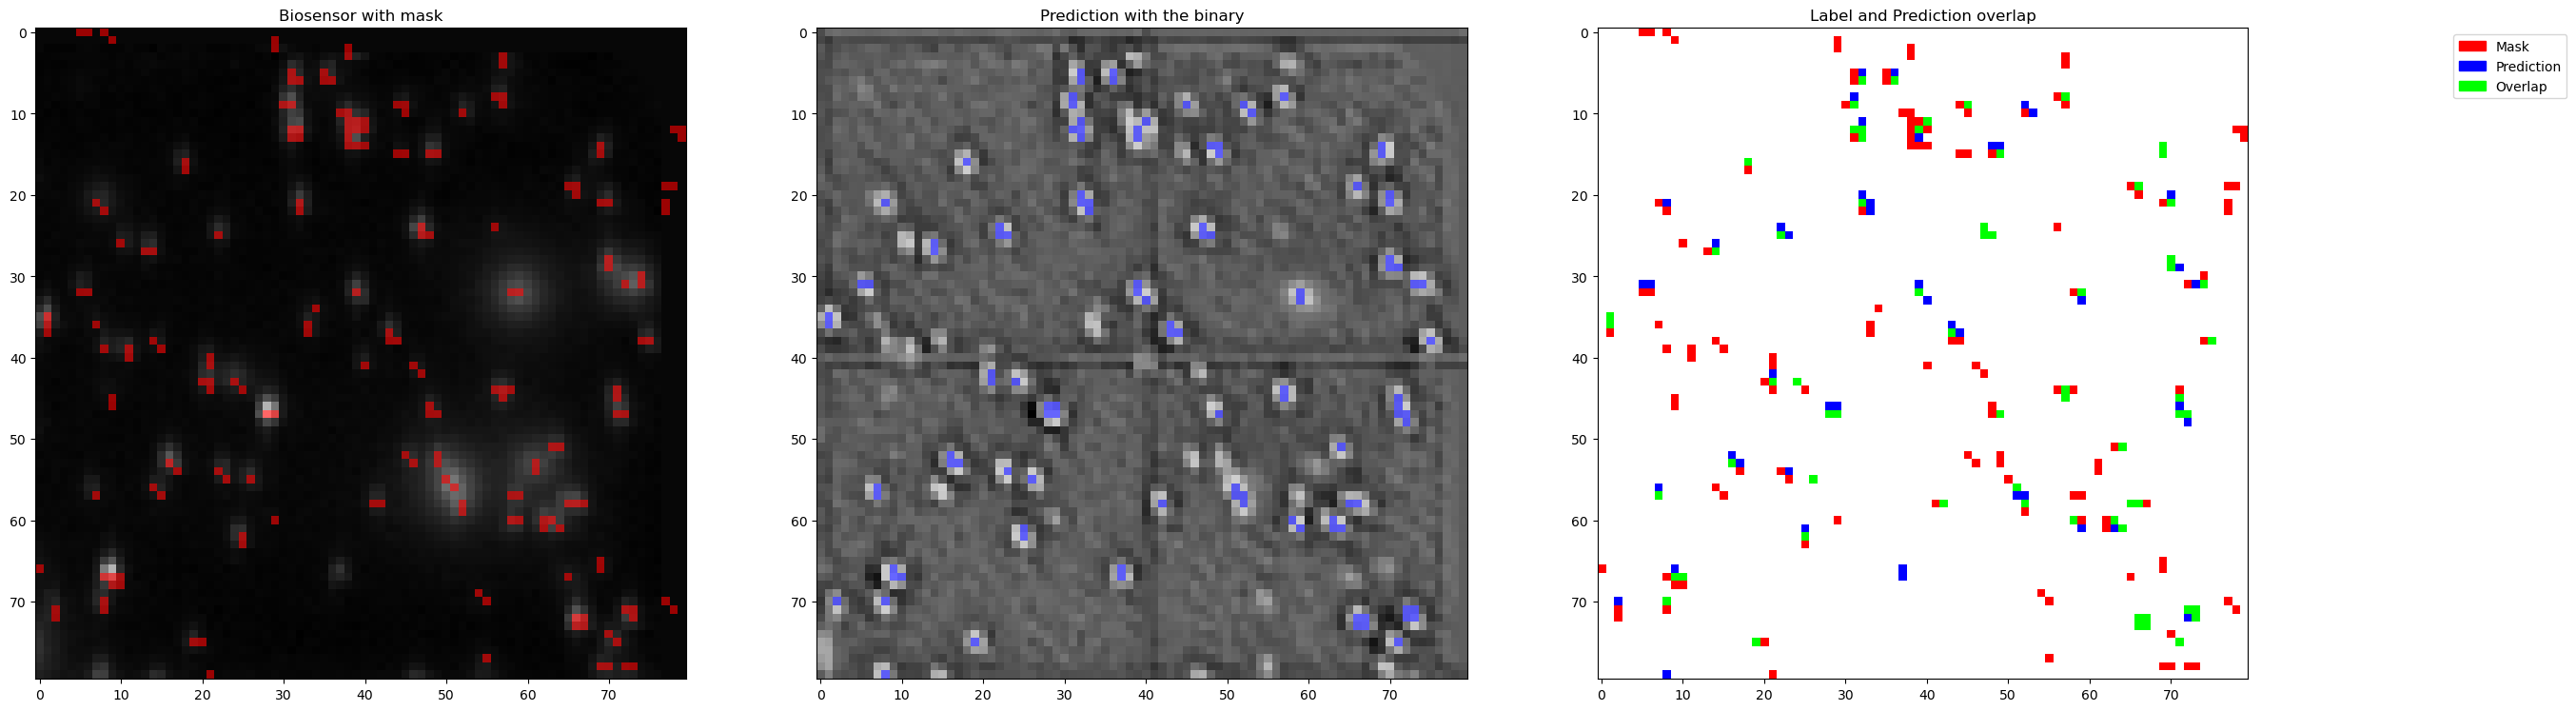

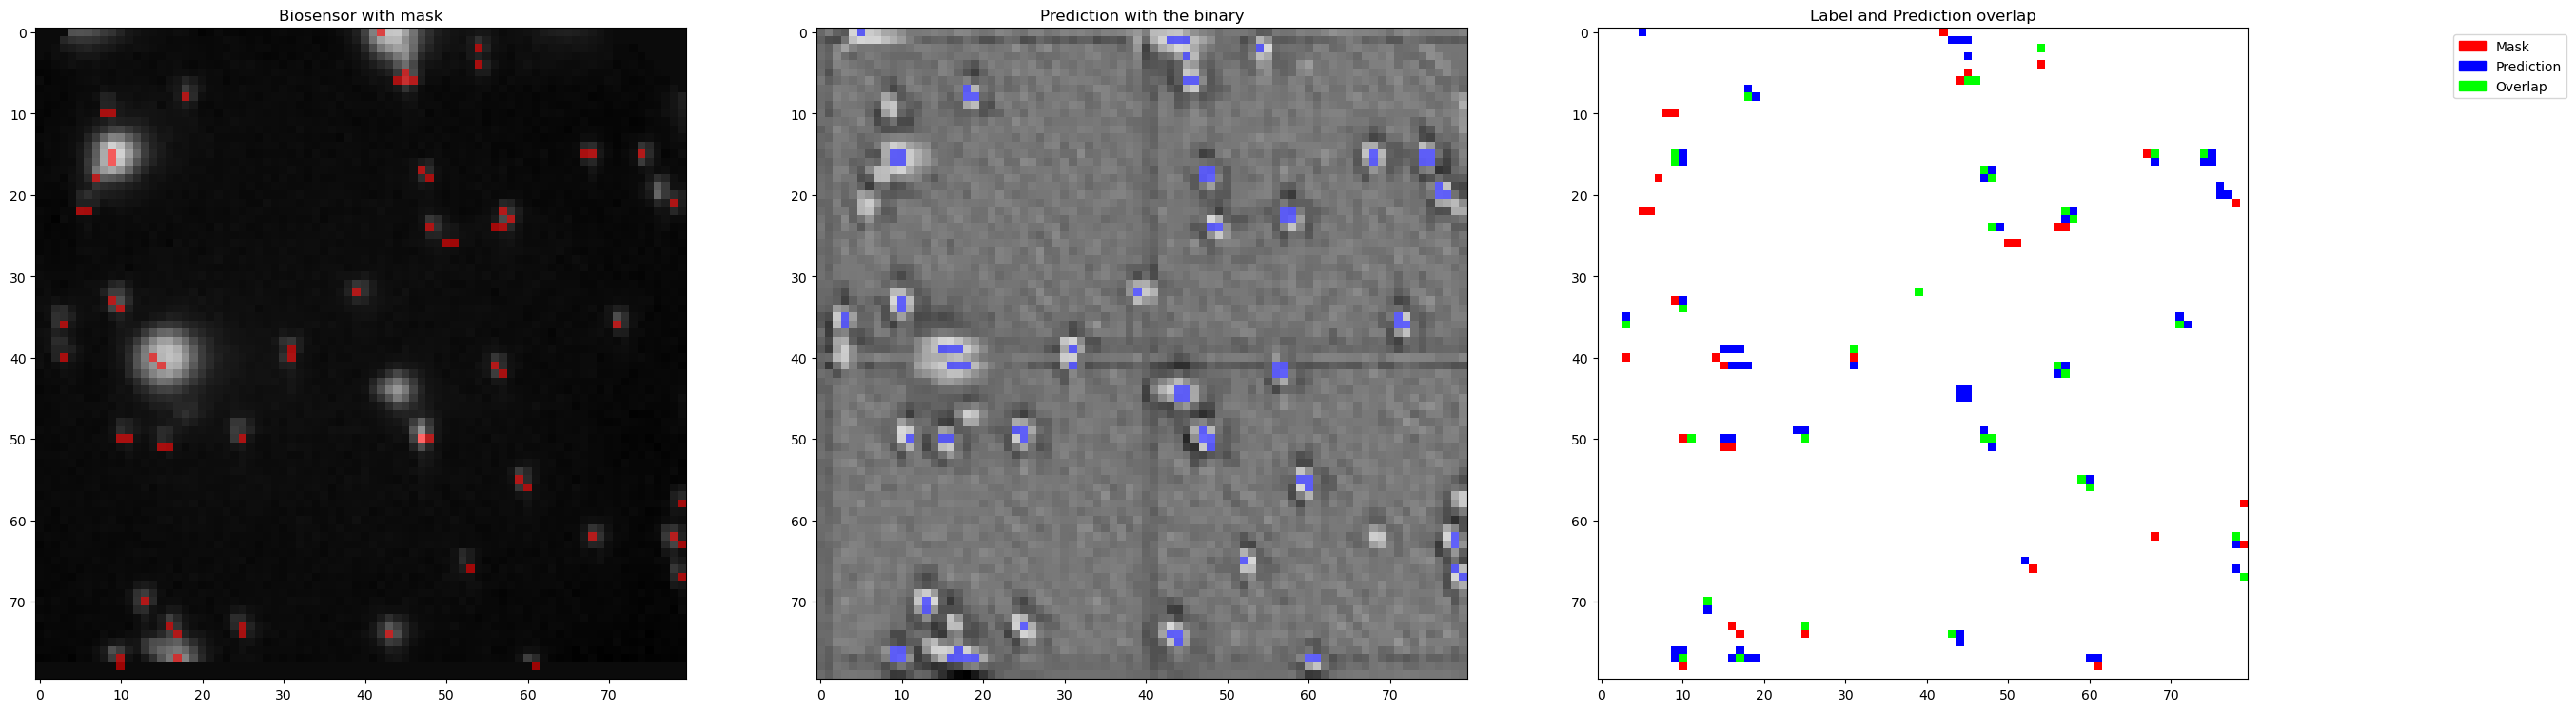

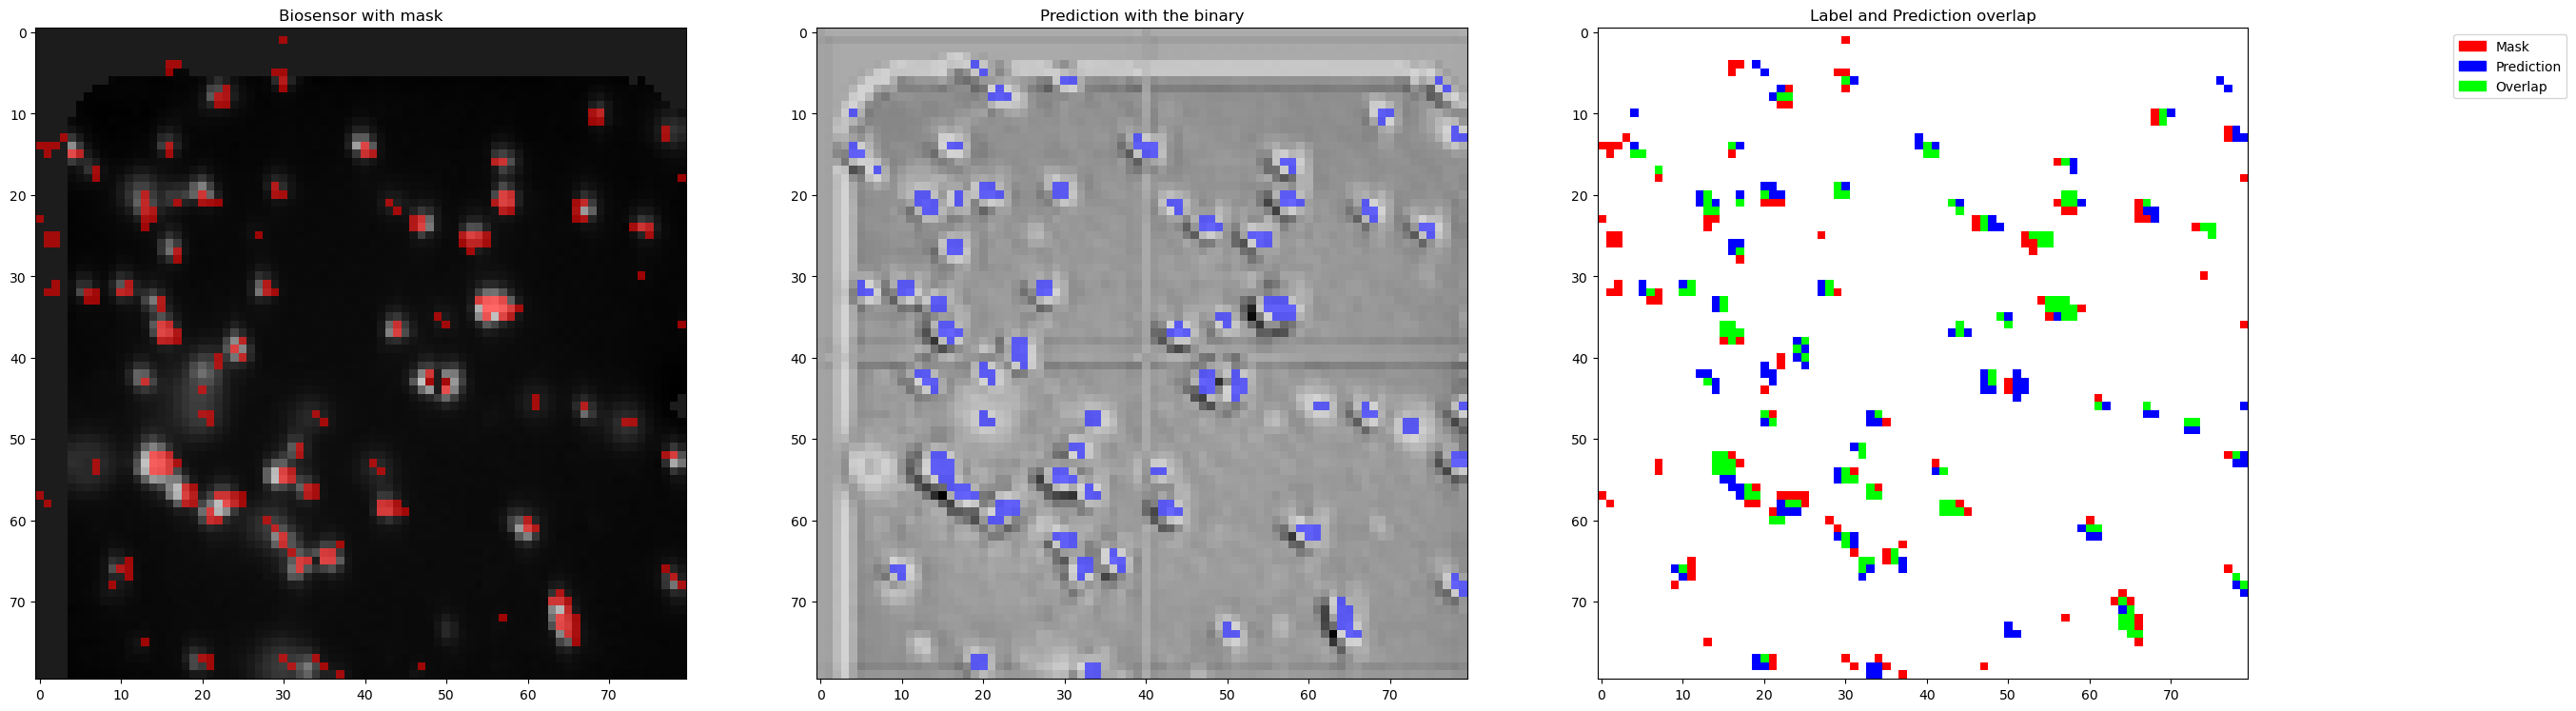

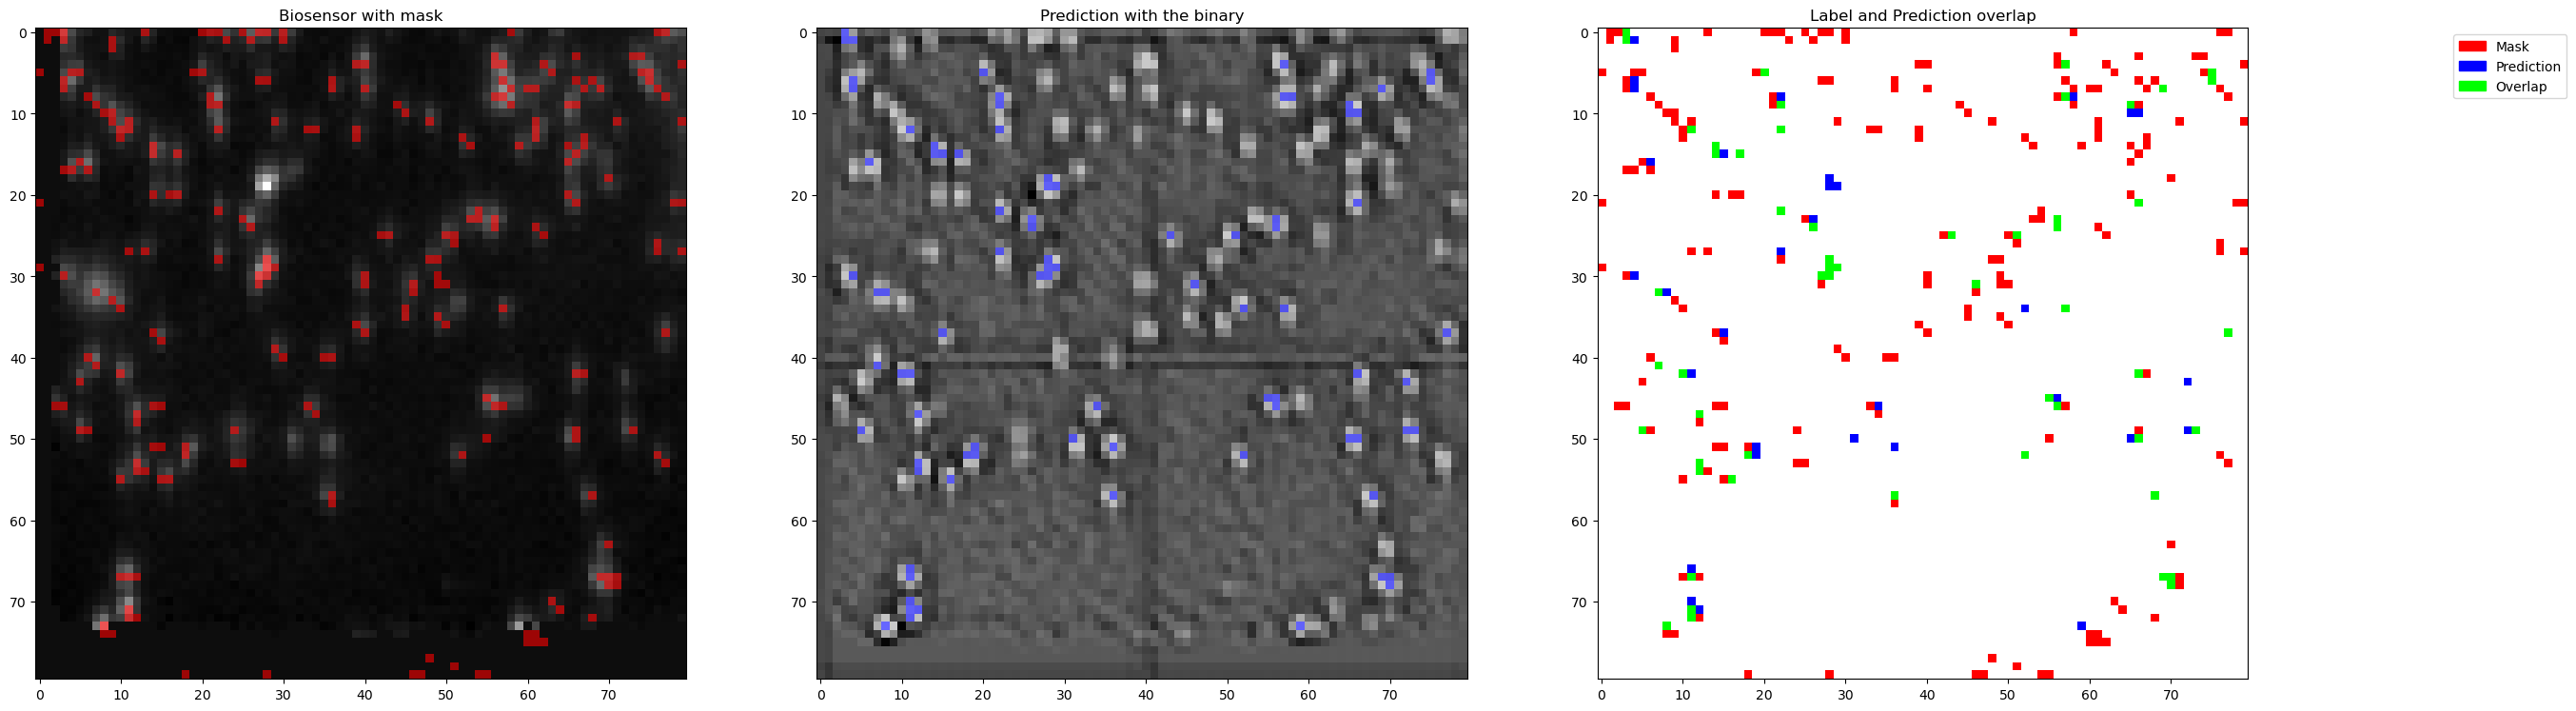

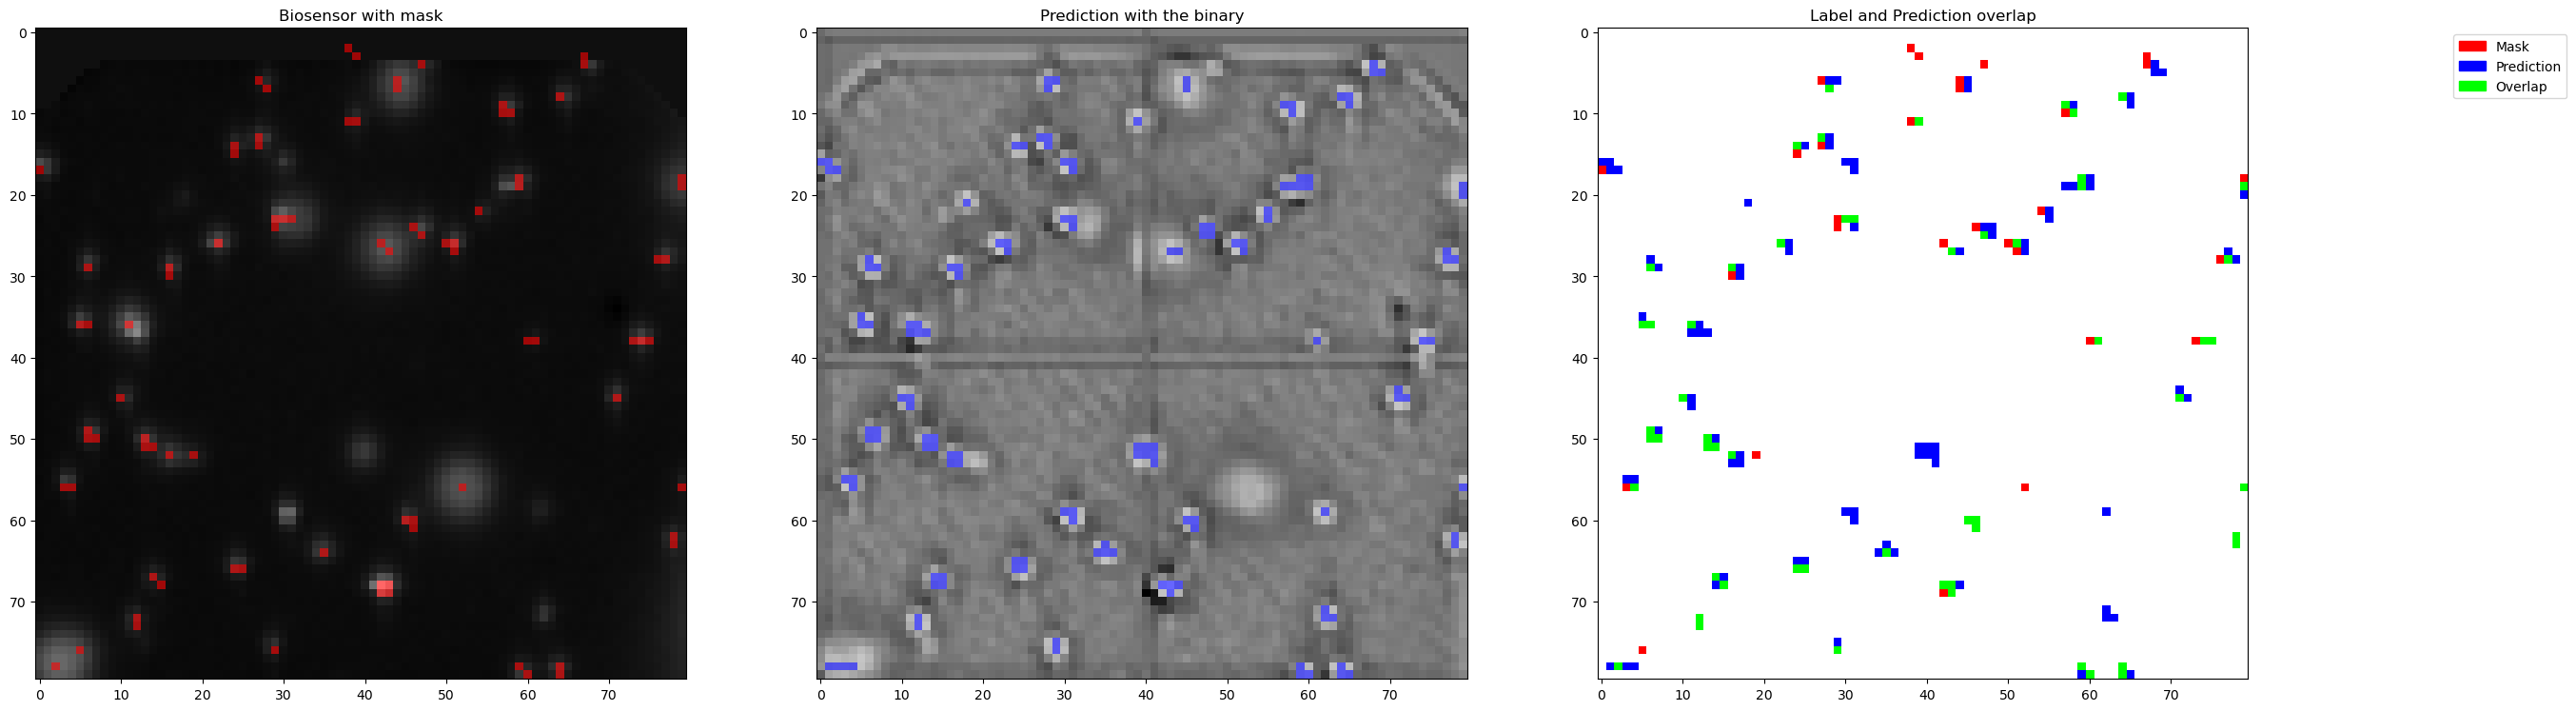

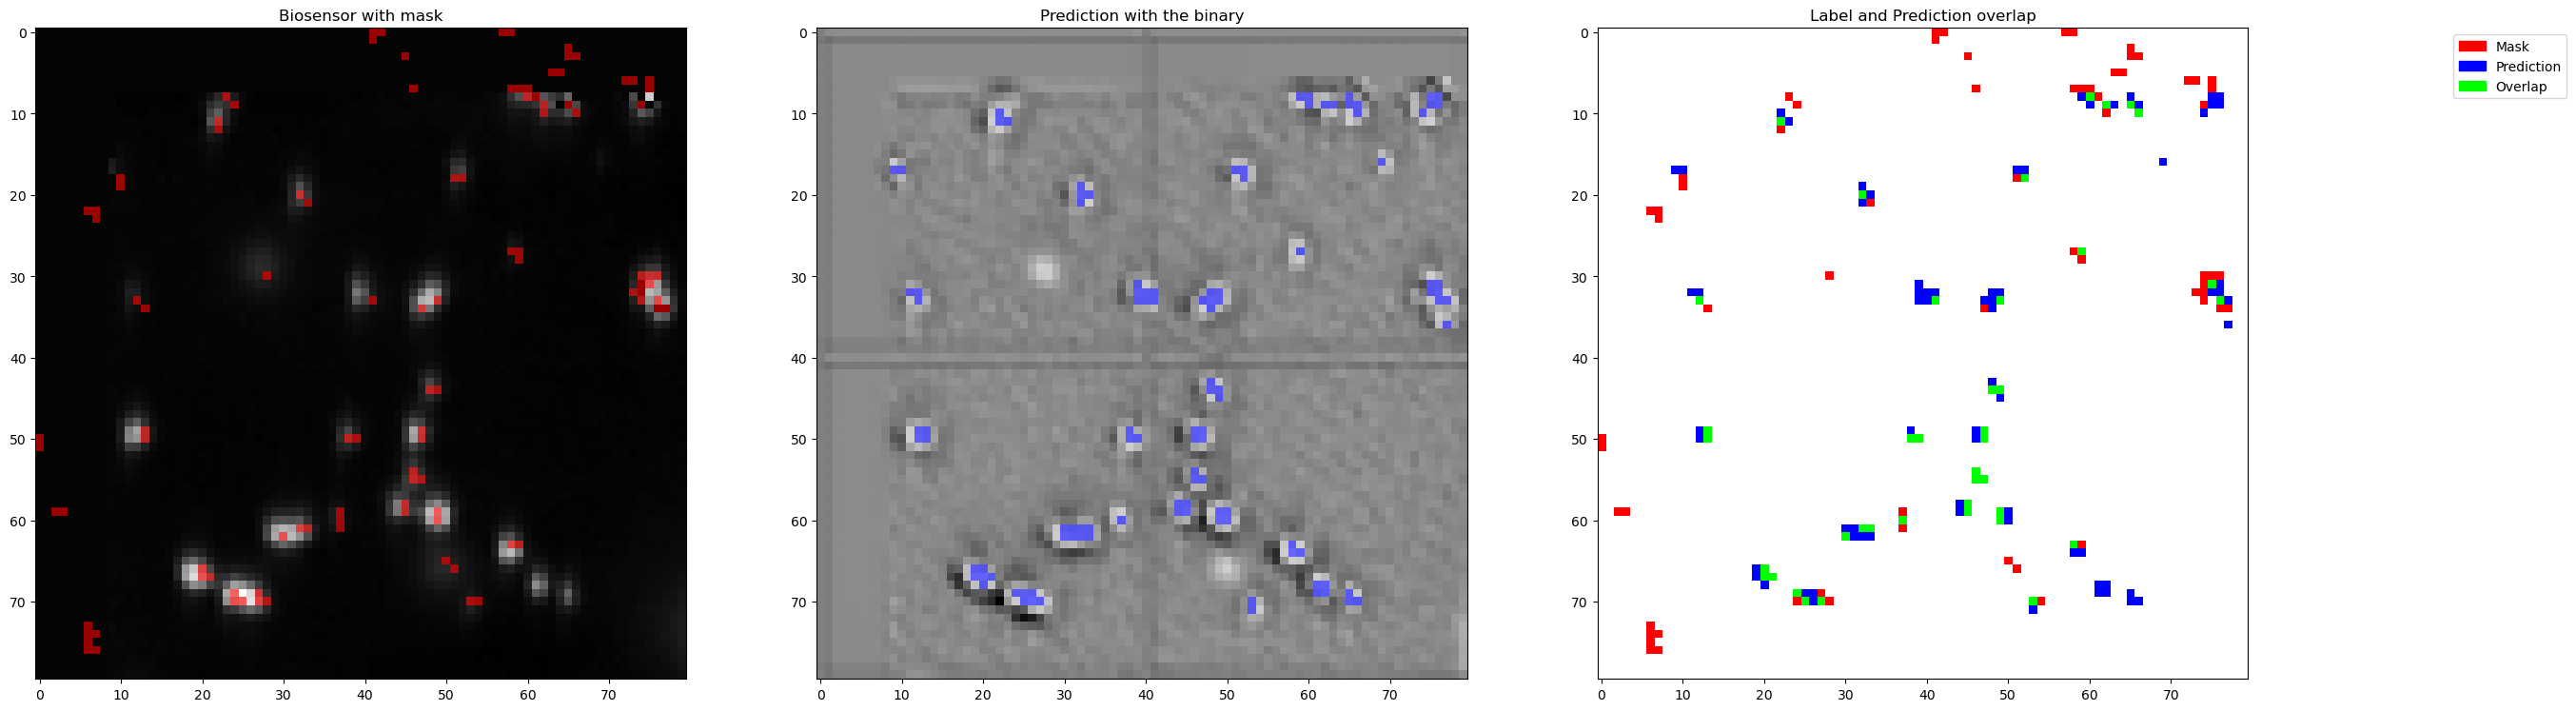

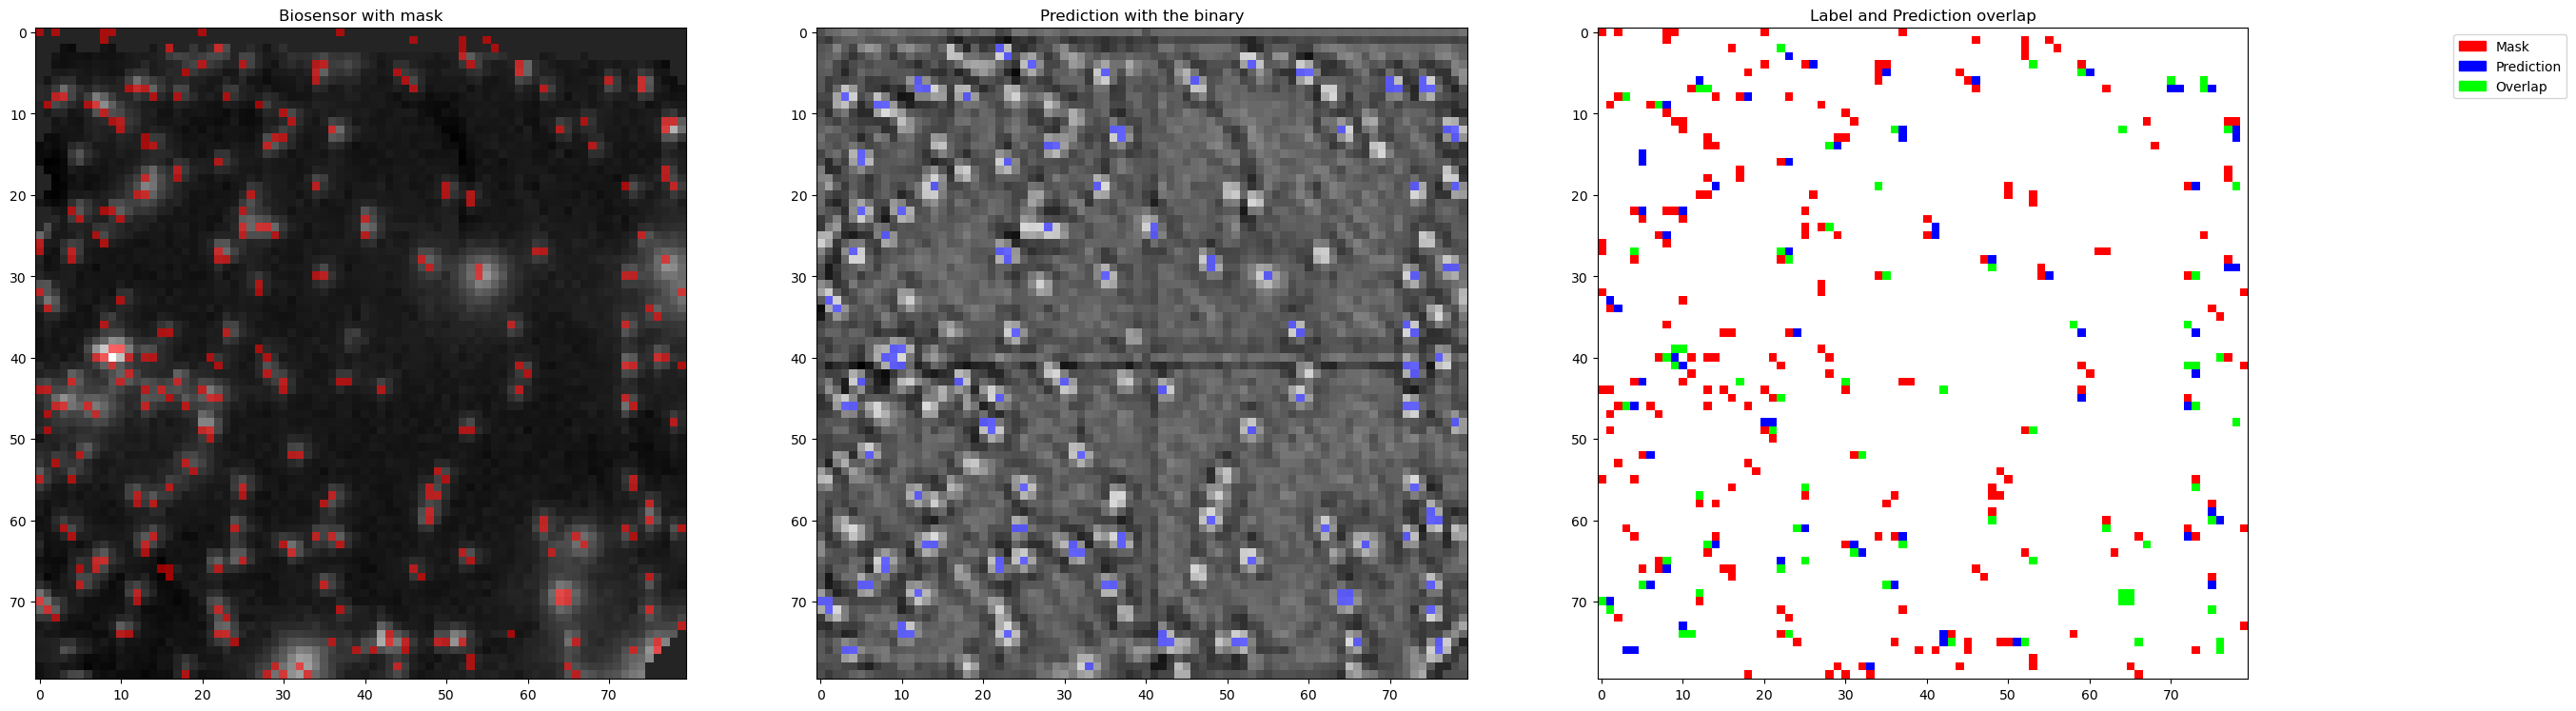

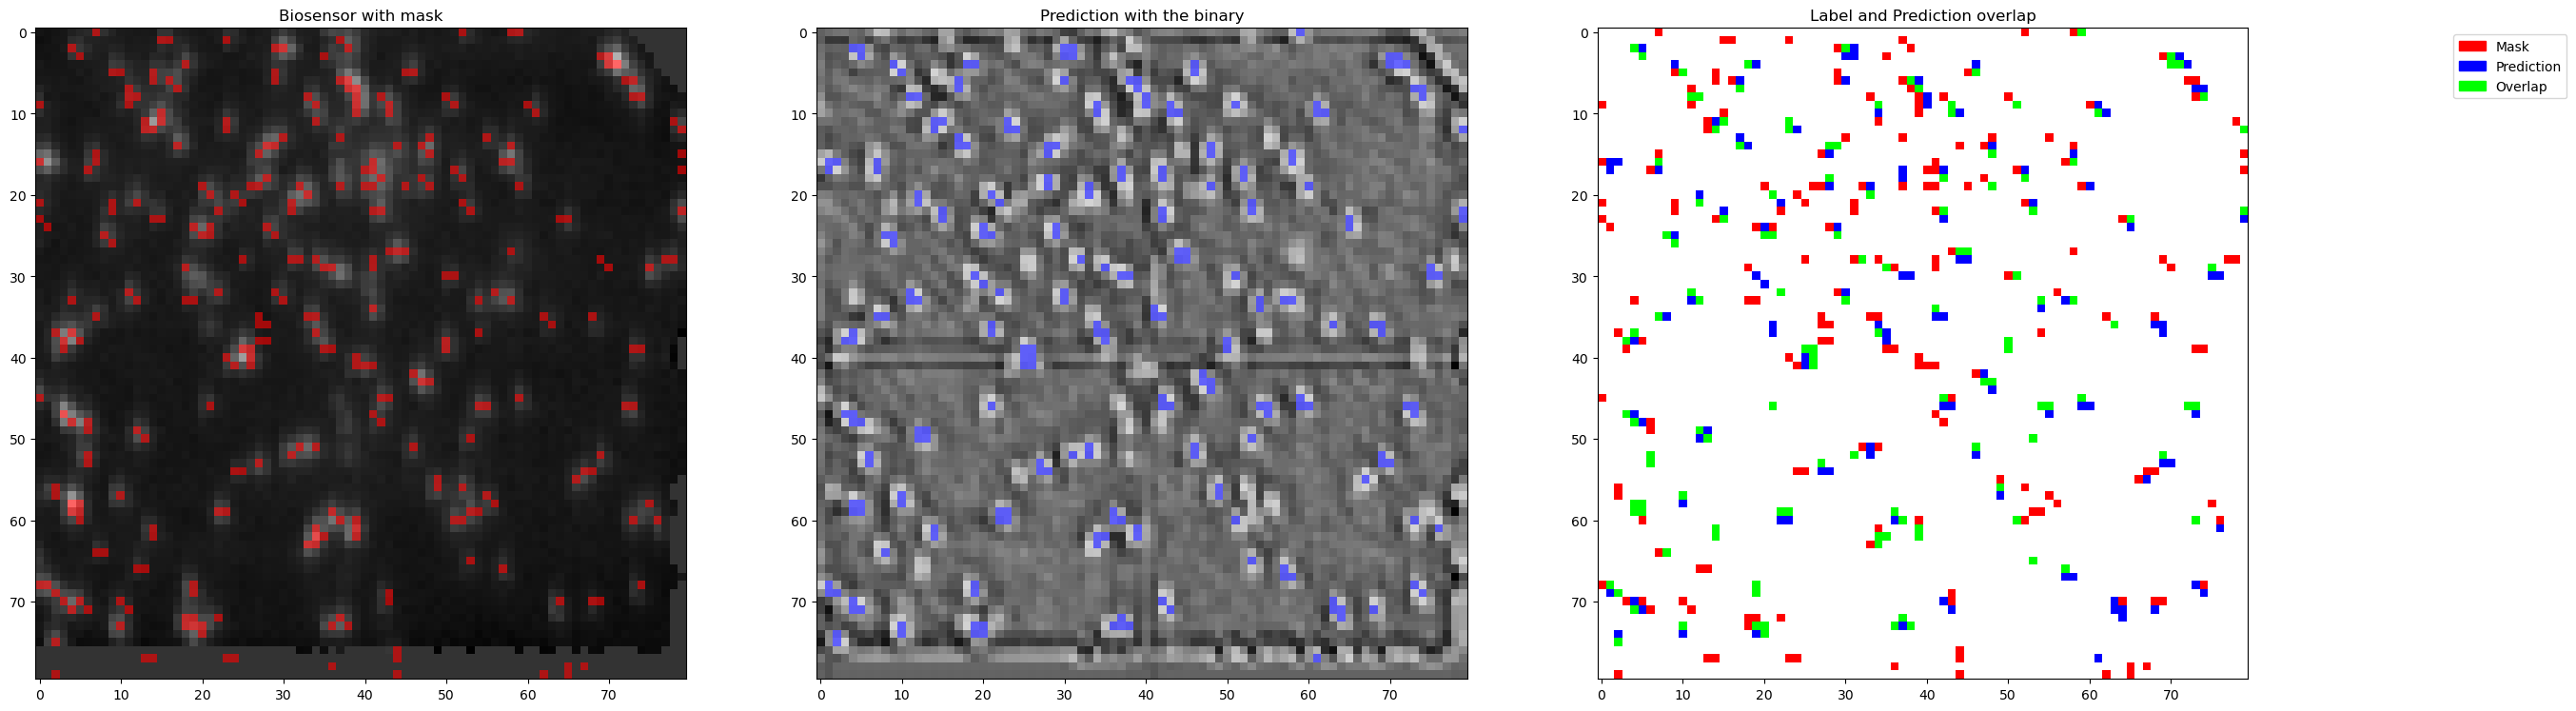

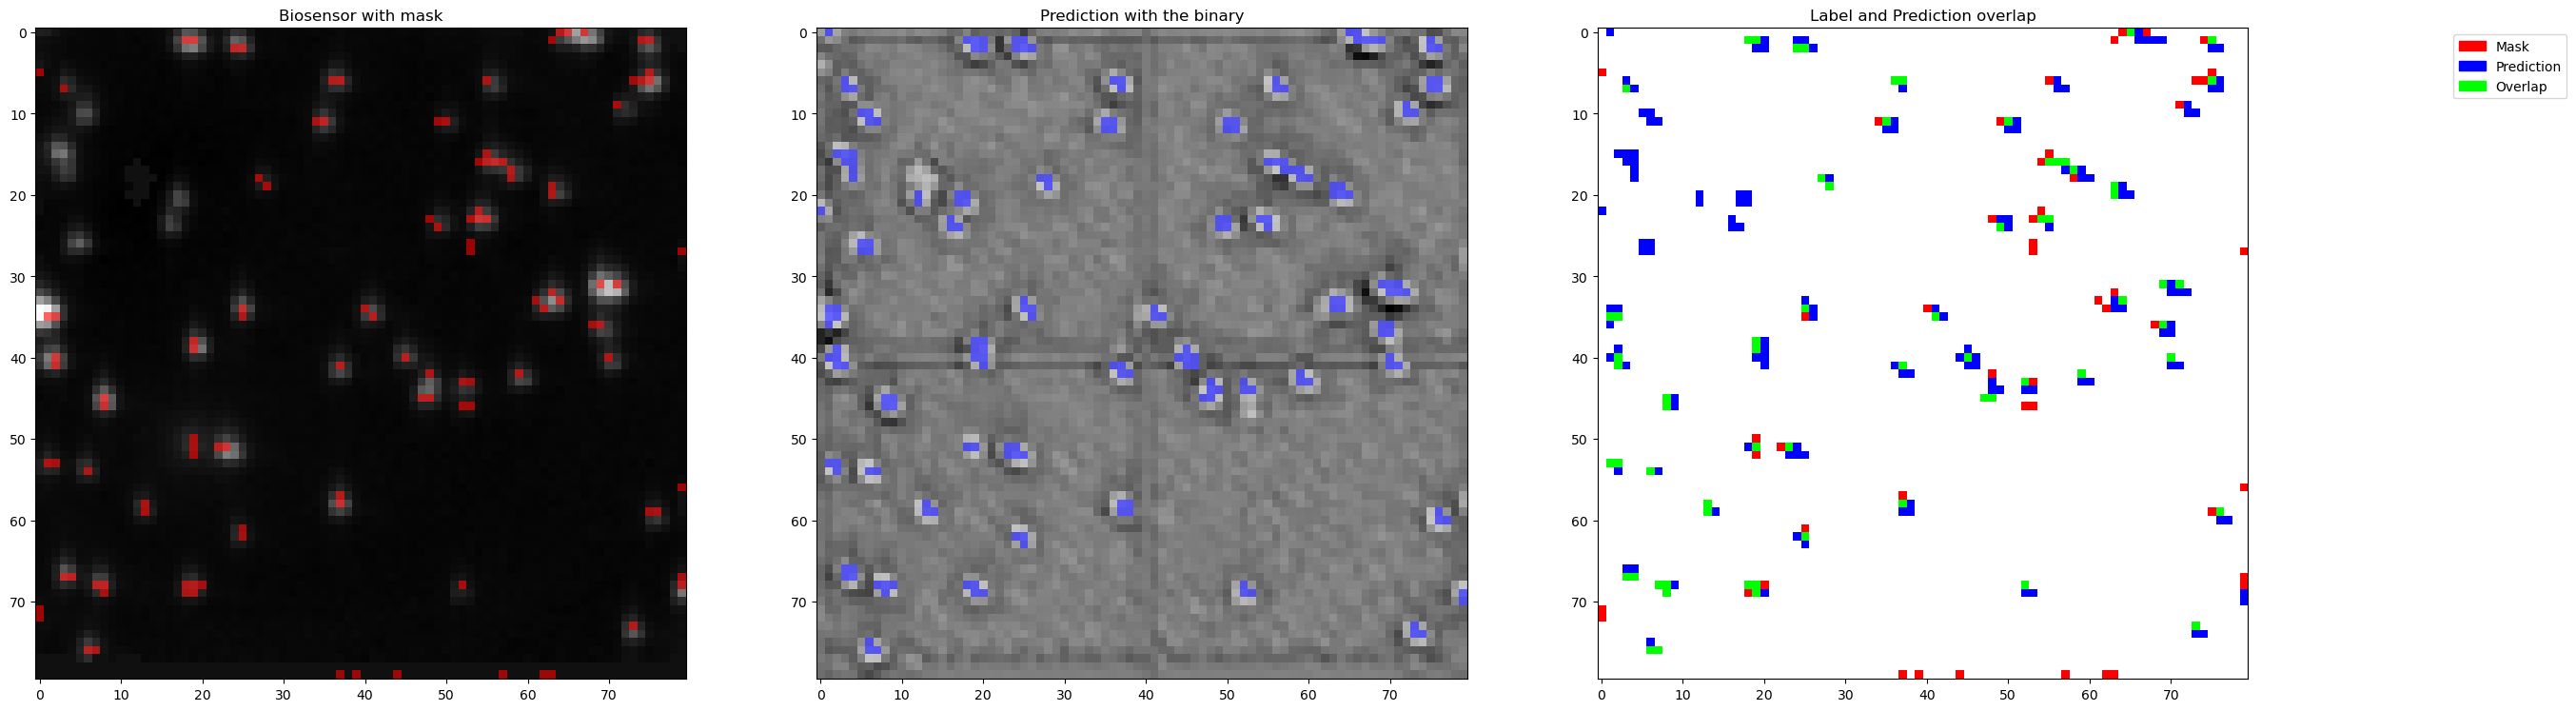

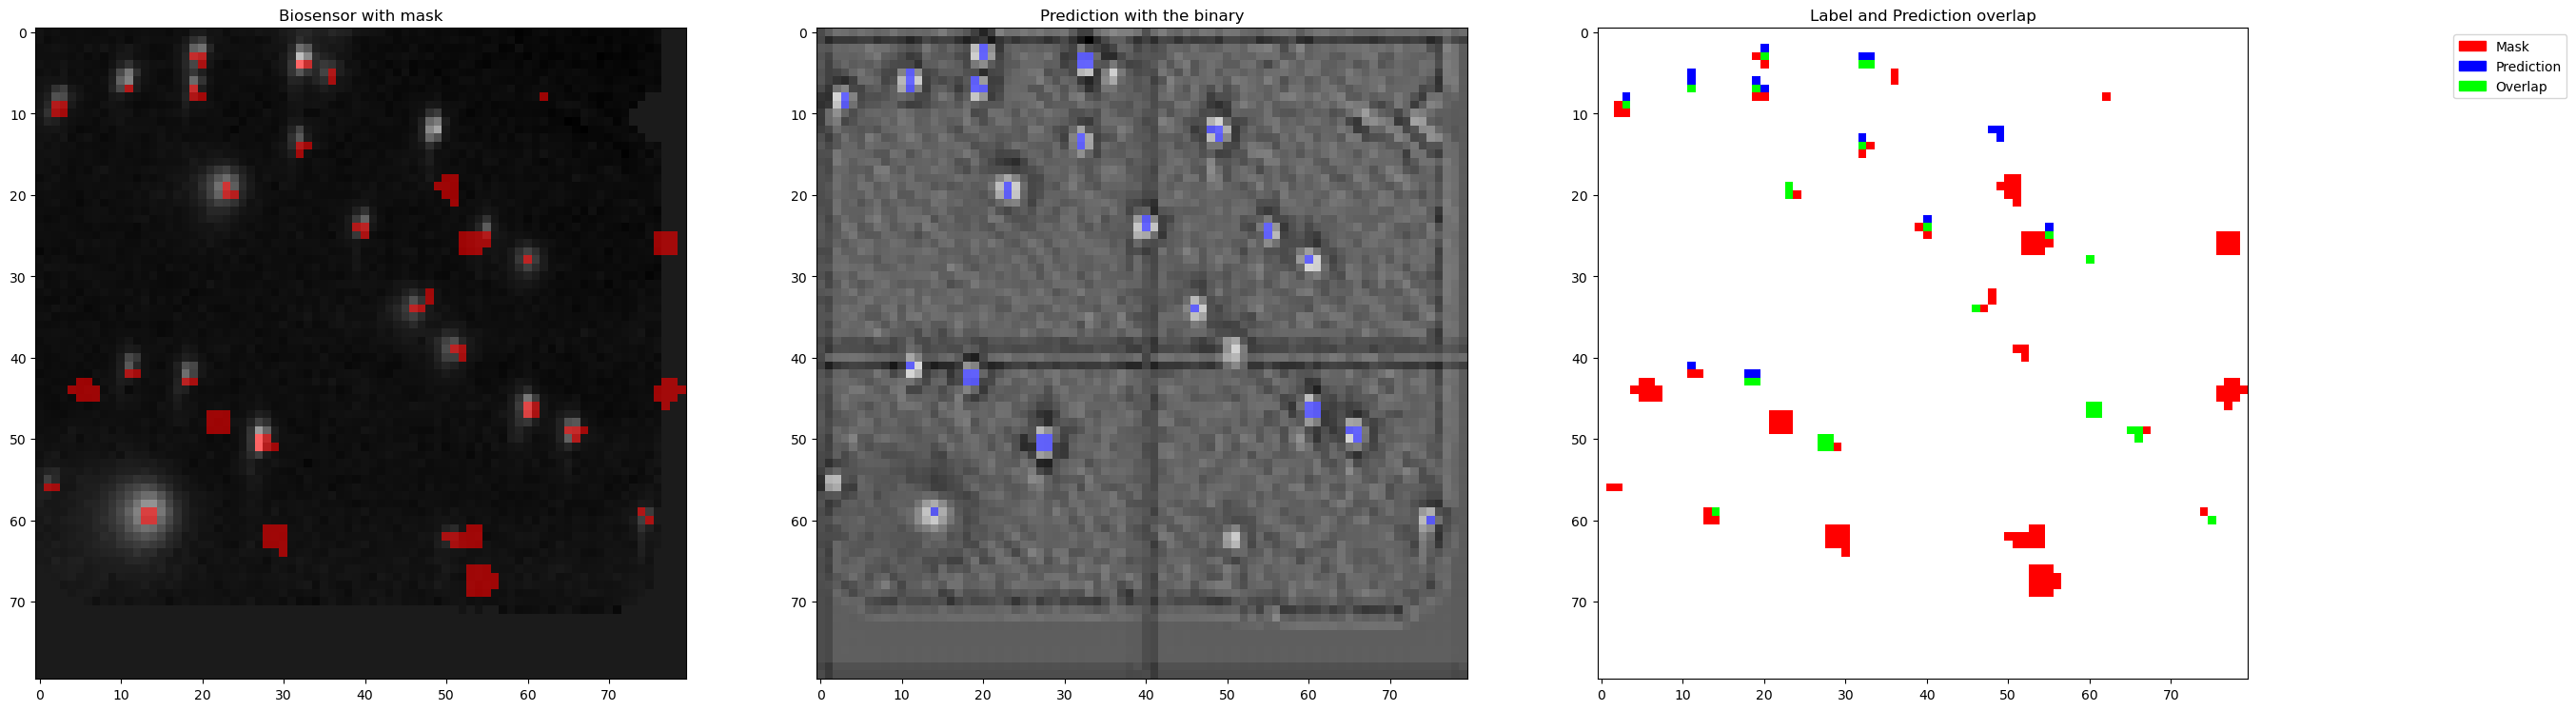

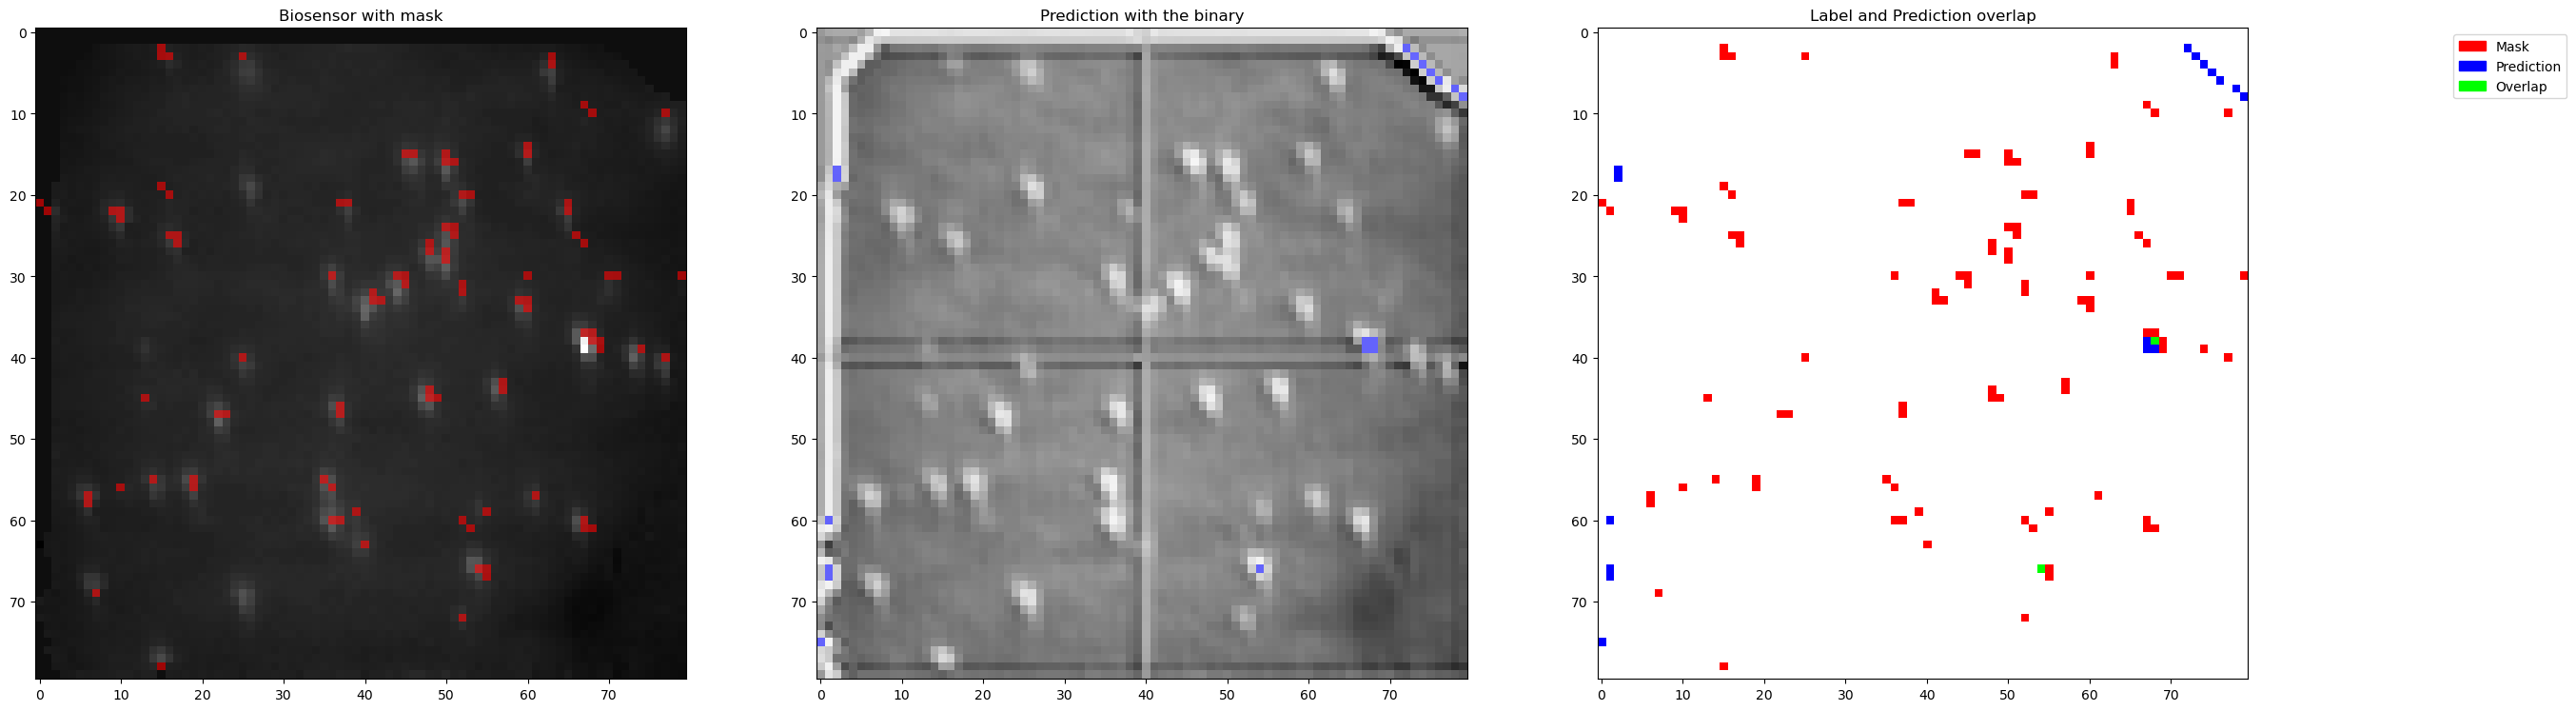

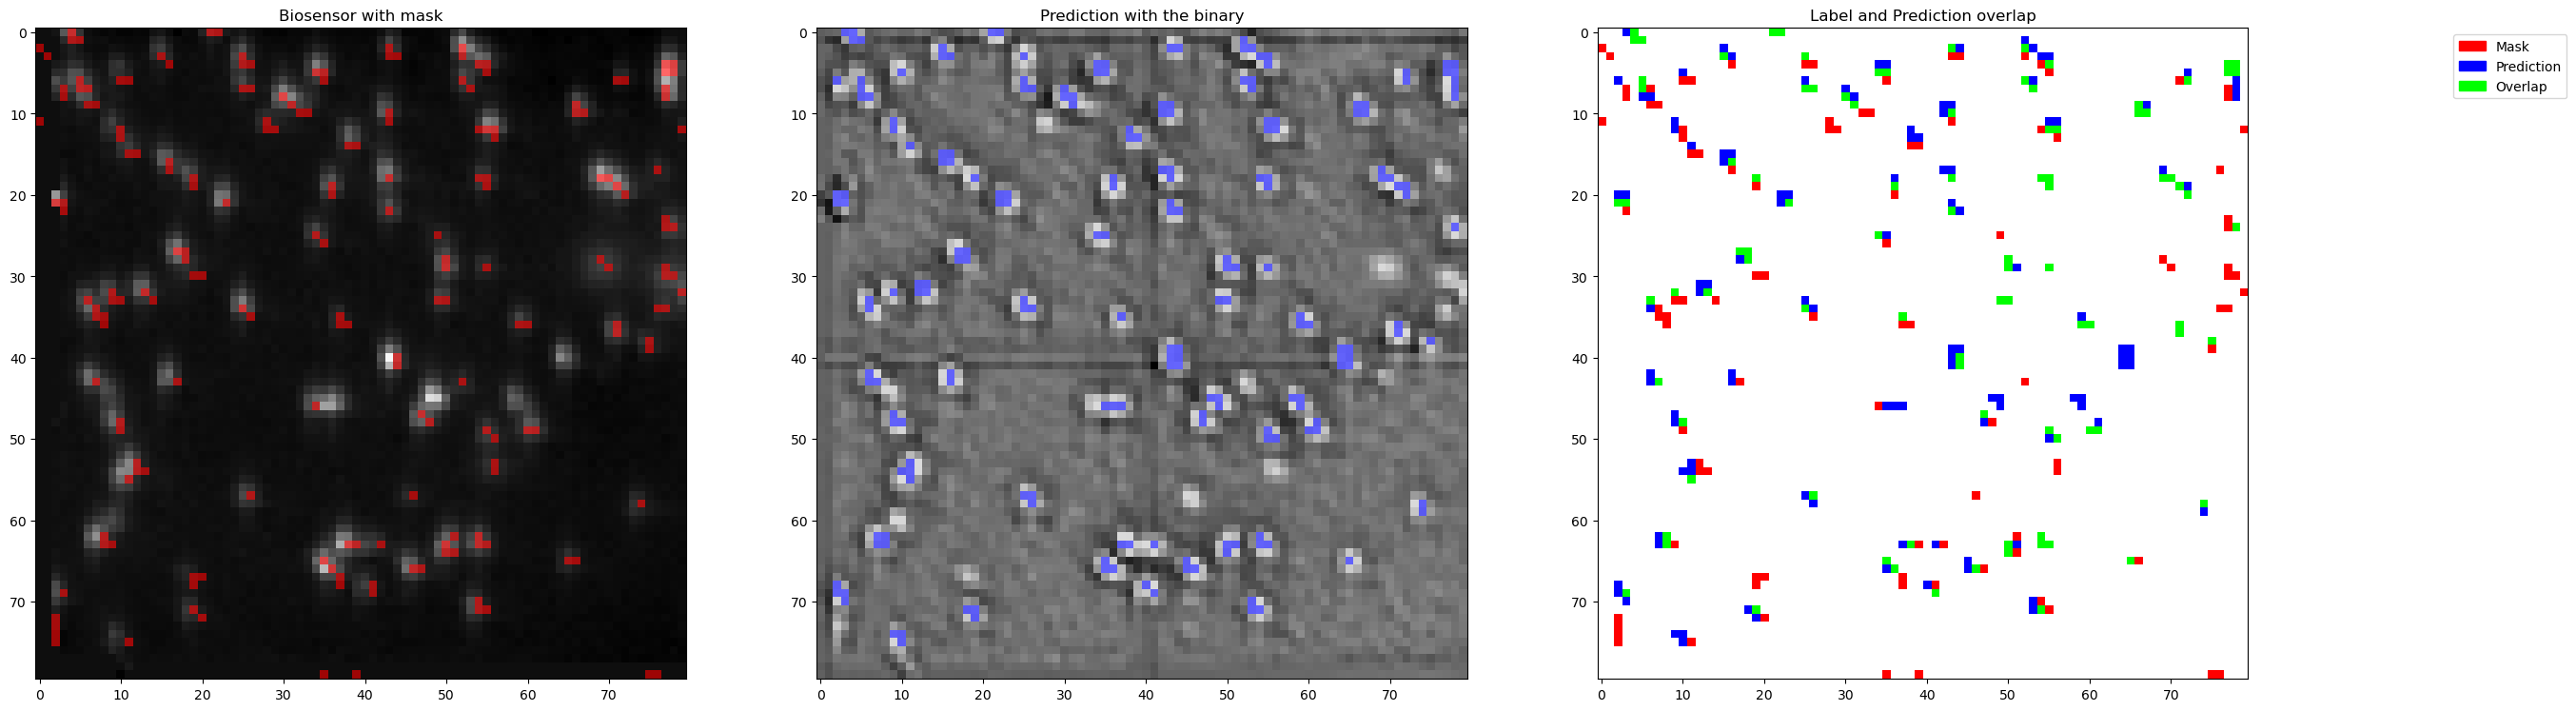

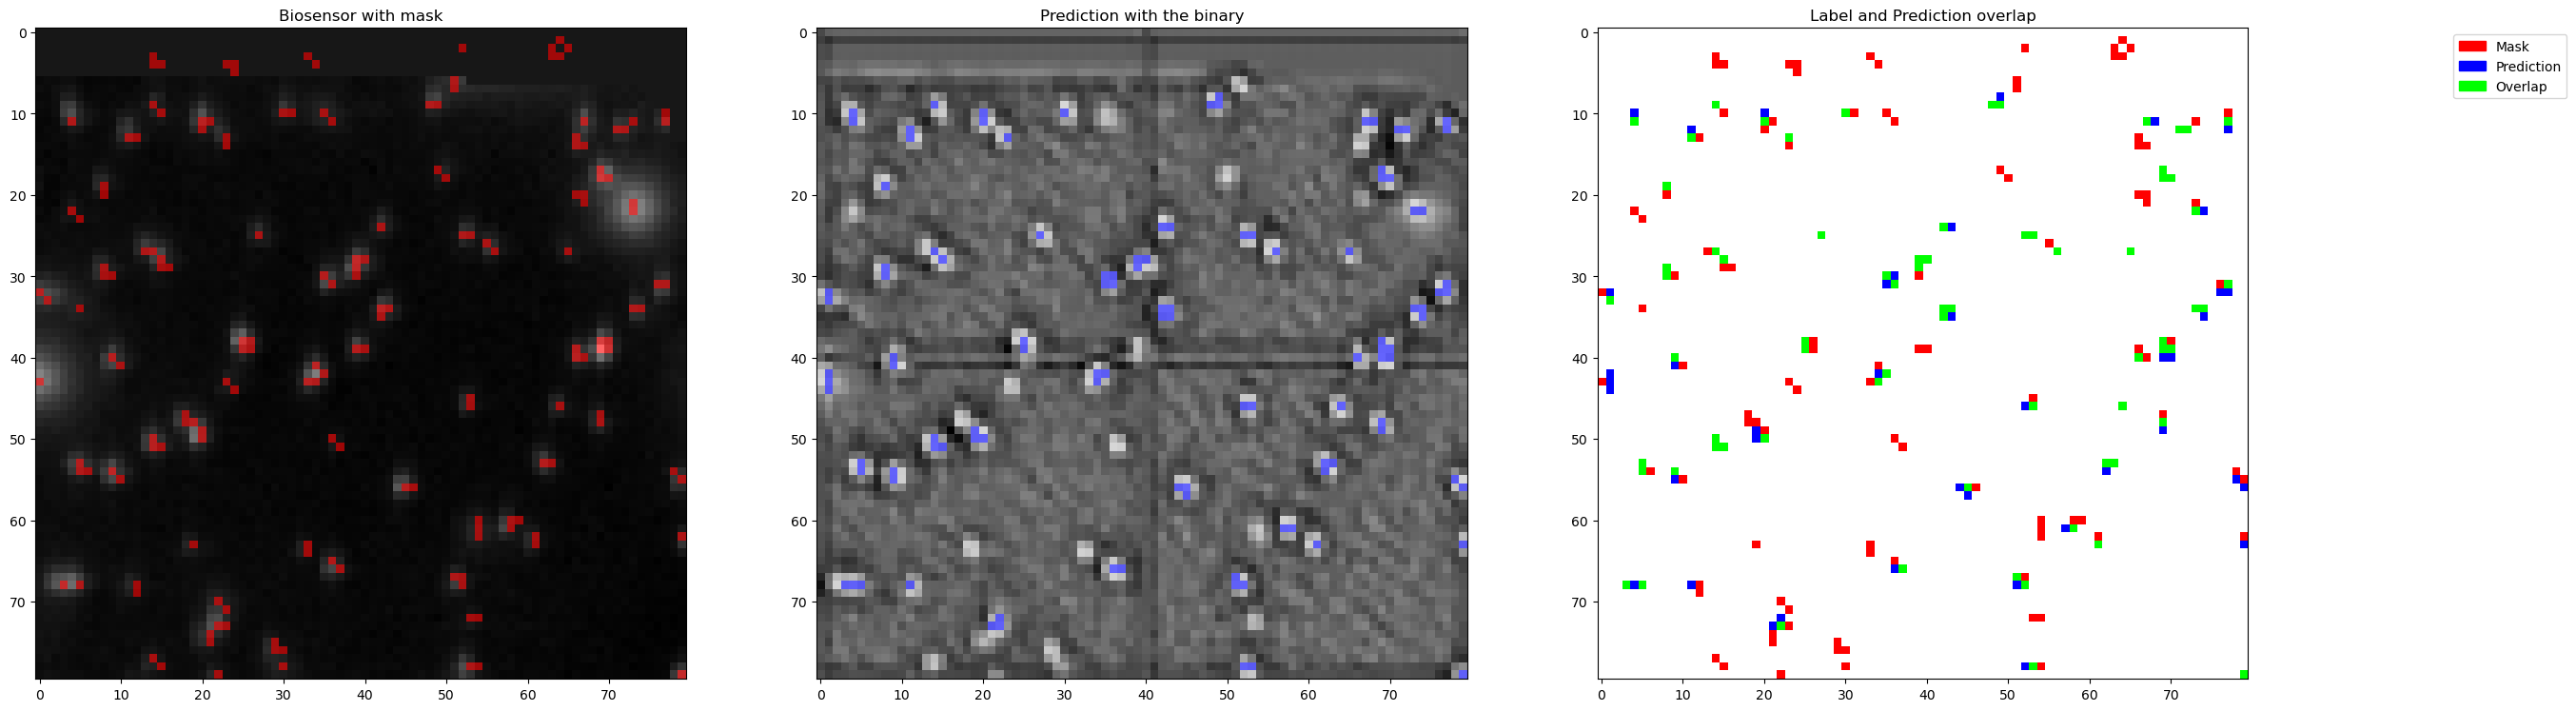

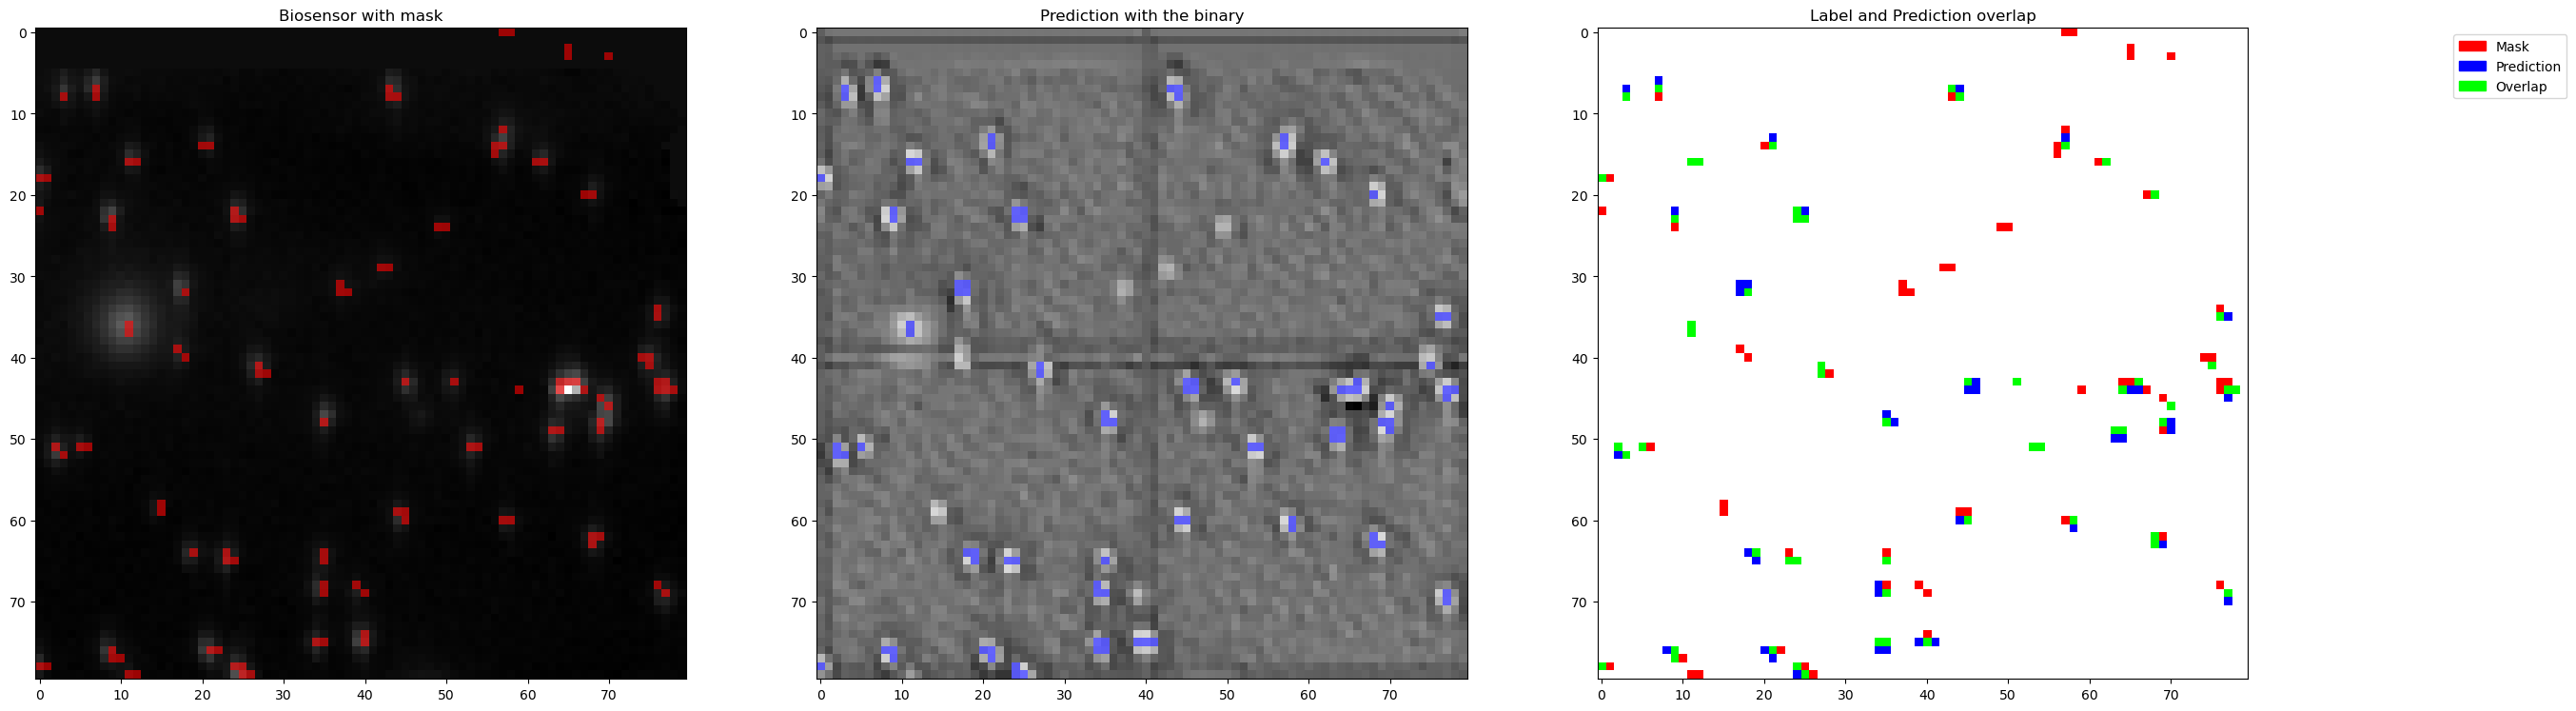

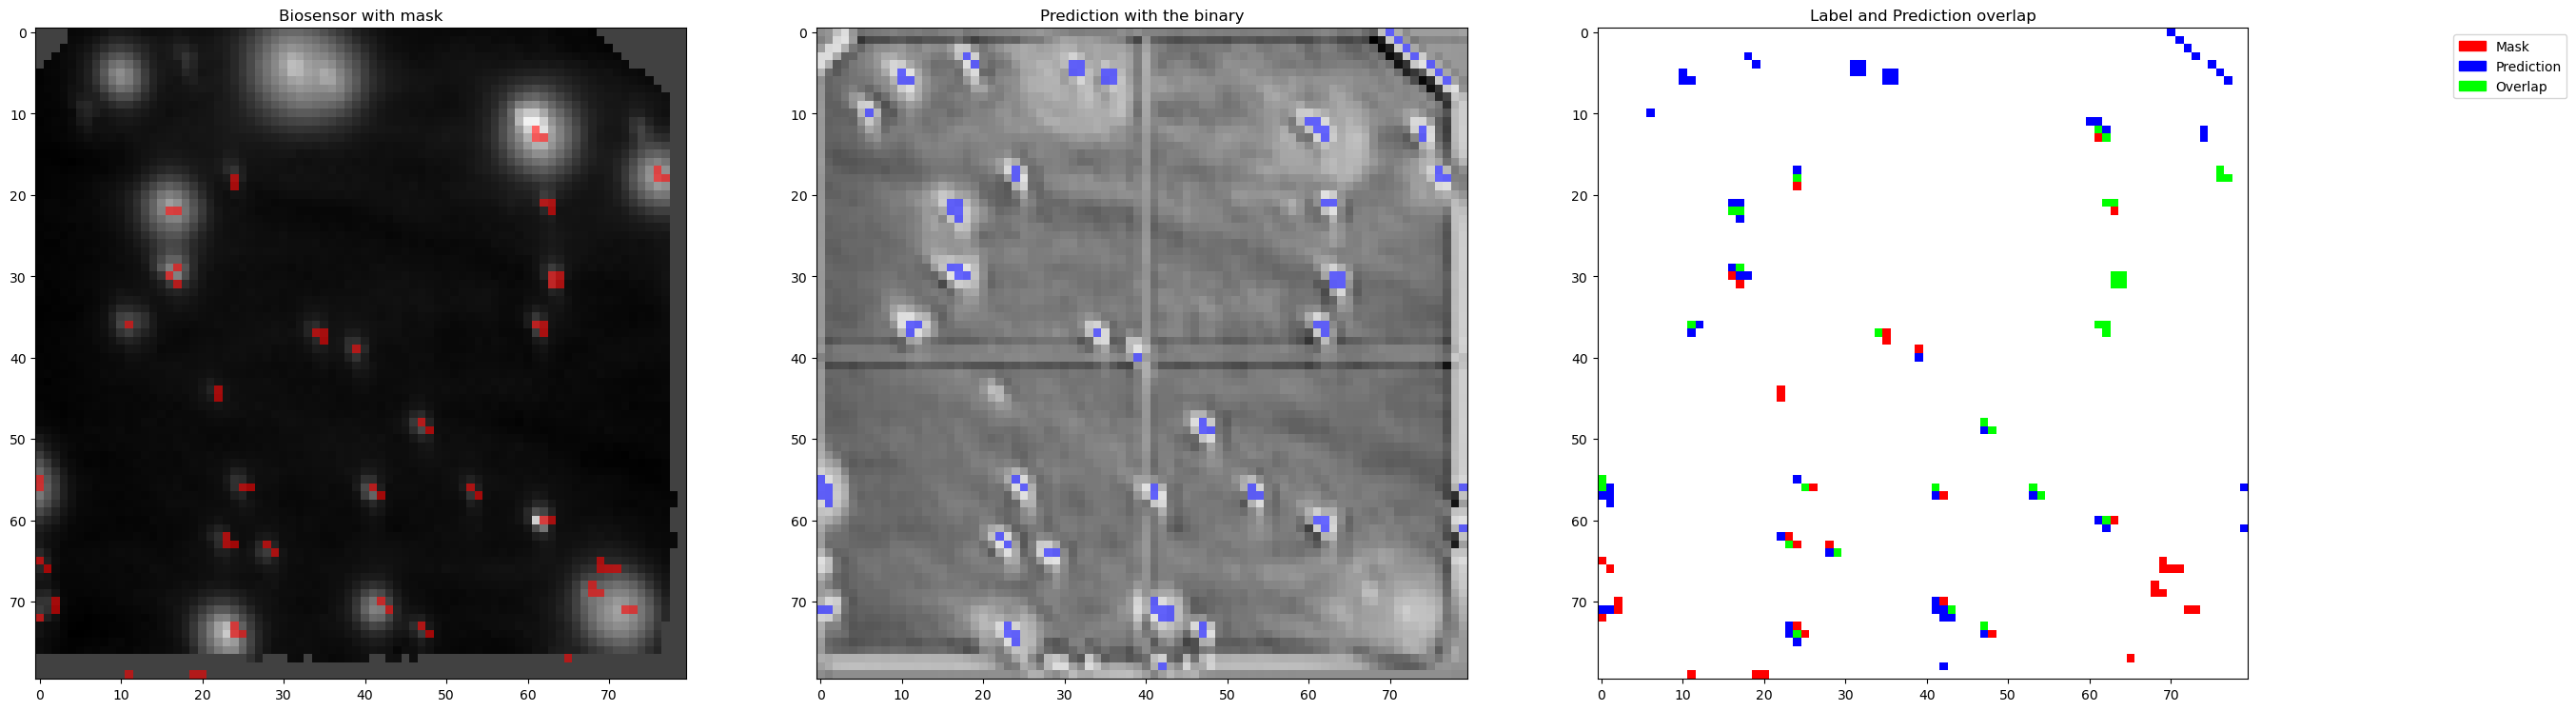

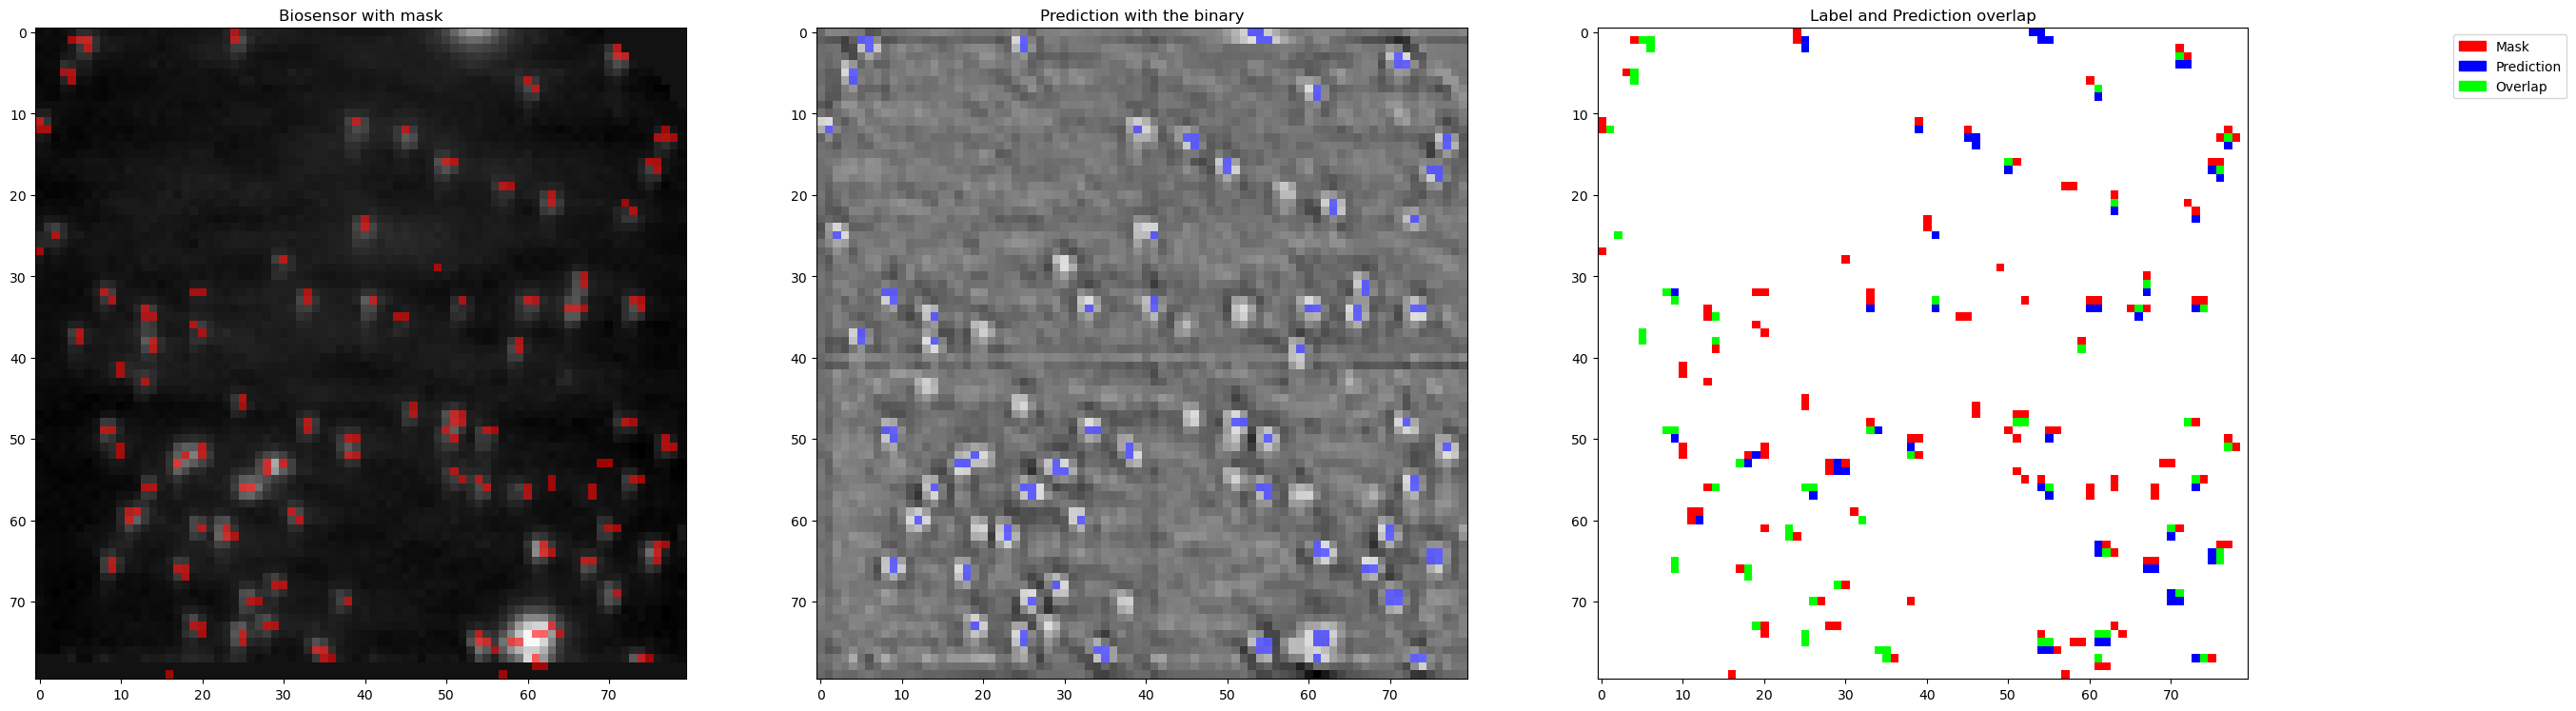

In [32]:
for batch_idx, (data, labels) in enumerate(test_loader):
    data = data.to(device)
    labels = labels.to(device)

    batch_size, tile_num, channels, height, width = data.shape
    data = data.view(batch_size * tile_num, channels, height, width)

    predictions = model(data)

    predictions = predictions.view(batch_size, tile_num, 1, height, width)
    data = data.view(batch_size, tile_num, channels, height, width)

    binary_predictions = (torch.nn.functional.sigmoid(predictions) > 0.5)
    # binary_predictions = binary_predictions.cpu().detach().numpy()
    # labels = labels.cpu().detach().numpy()
    # predictions = predictions.cpu().detach().numpy()

    for i in range(len(data)):
        # index = (batch_idx * len(data) + i + 1)
        # print(index)

        label = np.squeeze(labels[i])
        binary_prediction = np.squeeze(binary_predictions[i])
        label = merge_tiles(label)
        binary_prediction = merge_tiles(binary_prediction)
        d = merge_tiles(data[i,:,-1])
        prediction = merge_tiles(predictions[i, :, 0])

        plot_results(d, label, prediction, binary_prediction)

    break


In [ ]:
def plot_loader_data(loader, title):
    for batch_idx, (data, labels) in enumerate(loader):
        # Move the data and labels to the CPU
        # data = data.cpu().numpy()
        # labels = labels.cpu().numpy()

        if batch_idx == 1:
            break

        for i in range(batch_size):
            plot_tiles(data[i], labels[i])


plot_loader_data(test_loader, 'Test')

In [ ]:
def plot_loader_data(loader, title):
    for batch_idx, (data, labels) in enumerate(loader):
        # Move the data and labels to the CPU
        data = data.cpu().numpy()
        labels = labels.cpu().numpy()

        if batch_idx == 1:
            break

        # Plot each image in the batch
        for i in range(len(data)):
            index = (batch_idx * len(data) + i + 1)

            plt.figure(figsize=(20, 10))

            # Plot the input image
            plt.subplot(1, 3, 1)
            plt.imshow(data[i][-1], cmap='gray')
            plt.title(f'{title} - Image {index} ')

            # Plot the label
            plt.subplot(1, 3, 2)
            plt.imshow(labels[i], cmap='gray')
            plt.title(f'{title} - Label {index}')

            plt.subplot(1, 3, 3)
            plt.imshow(data[i][-1], cmap='gray')
            plt.imshow(labels[i], cmap='Reds', alpha=0.25)

            plt.show()

plot_loader_data(test_loader, 'Test')